In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [158]:
test = "31"
csv_path = Path(f"Output/empty/opacity/{test}/camera1_opacity_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"opacity", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()


,iter,opacity,loss,analytic_grad
0,0,0.00,0.004989,-0.009044
1,1,0.05,0.004526,-0.008529
2,2,0.10,0.004088,-0.008031
3,3,0.15,0.003669,-0.007613
4,4,0.20,0.003281,-0.007139


In [165]:
import numpy as np

# ---- Edit this name if your CSV uses a different column ----
NUMERICAL_COLUMN = "numerical_opacity_grad_forward"  # forward-difference gradient

required_columns = {"opacity", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

opacity = df["opacity"].to_numpy(dtype=np.float64)
loss = df["loss"].to_numpy(dtype=np.float64)

# Forward difference: opacity/opacity at i uses (i+1 - i)
grad_fd = np.zeros_like(loss)
grad_fd[:-1] = (loss[1:] - loss[:-1]) / (opacity[1:] - opacity[:-1])

# Last point: fallback to backward difference (no i+1 available)
grad_fd[-1] = (loss[-1] - loss[-2]) / (opacity[-1] - opacity[-2])

df[NUMERICAL_COLUMN] = grad_fd

df[["iter", "opacity", "loss", NUMERICAL_COLUMN]]


,iter,opacity,loss,numerical_opacity_grad_forward
0,0,0.00,0.004989,-0.009275
1,1,0.05,0.004526,-0.008747
2,2,0.10,0.004088,-0.008379
3,3,0.15,0.003669,-0.007770
4,4,0.20,0.003281,-0.007450
5,5,0.25,0.002908,-0.006772
6,6,0.30,0.002570,-0.005988
7,7,0.35,0.002270,-0.006227
8,8,0.40,0.001959,-0.005226
9,9,0.45,0.001698,-0.004786


PosixPath('Output/empty/opacity/31/camera1_opacity_sweep_grad_subplots.png')

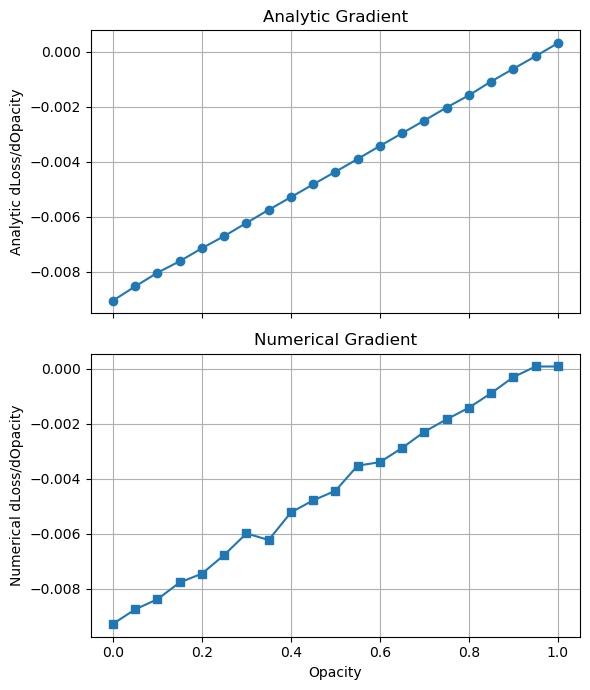

In [166]:
# ---- Edit this if your CSV uses a different column name ----

required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 7), sharex=True)

# --- Top: Analytic ---
axes[0].plot(df["opacity"], df["analytic_grad"], marker="o")
axes[0].set_ylabel("Analytic dLoss/dOpacity")
axes[0].set_title("Analytic Gradient")
axes[0].grid(True)

# --- Bottom: Numerical ---
axes[1].plot(df["opacity"], df[NUMERICAL_COLUMN], marker="s")
axes[1].set_xlabel("Opacity")
axes[1].set_ylabel("Numerical dLoss/dOpacity")
axes[1].set_title("Numerical Gradient")
axes[1].grid(True)

output_png = csv_path.with_name(csv_path.stem + "_grad_subplots.png")
plt.tight_layout()
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png

PosixPath('Output/empty/opacity/31/camera1_opacity_sweep_grad_compare.png')

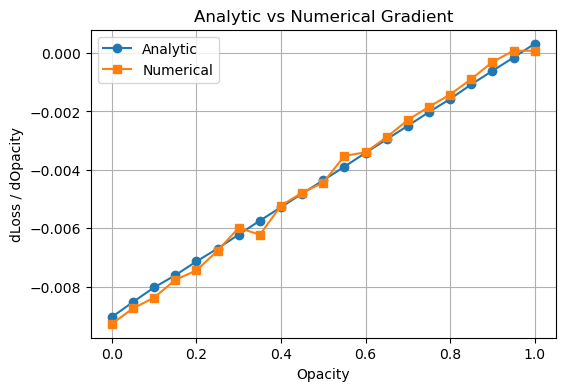

In [167]:
# ---- Edit this name if your CSV uses a different column ----

required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["opacity"], df["analytic_grad"], marker="o", label="Analytic")
plt.plot(df["opacity"], df[NUMERICAL_COLUMN], marker="s", label="Numerical")

plt.xlabel("Opacity")
plt.ylabel("dLoss / dOpacity")
plt.title("Analytic vs Numerical Gradient")
plt.grid(True)
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


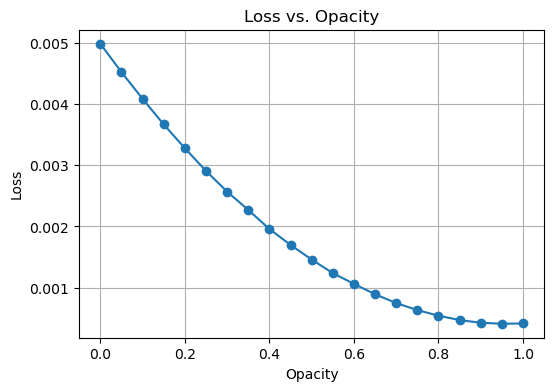

In [168]:
plt.figure(figsize=(6, 4))
plt.plot(df["opacity"], df["loss"], marker="o")
plt.xlabel("Opacity")
plt.ylabel("Loss")
plt.title("Loss vs. Opacity")
plt.grid(True)

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
#plt.savefig(output_png, dpi=200, bbox_inches="tight")

#output_png


## BETA PARAMETER

In [173]:
test = "7"
csv_path = Path(f"Output/empty/beta/{test}/camera1_beta_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"beta", "loss"}
if not required_columns.issubset(df.columns):
    print(df.columns)
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()


,iter,beta,loss,analytic_grad
0,0,3.0,0.004972,0.000035
1,1,2.7,0.004959,0.000048
2,2,2.4,0.004942,0.000065
3,3,2.1,0.004920,0.000088
4,4,1.8,0.004888,0.000121


In [174]:
import numpy as np

# ---- Edit this name if your CSV uses a different column ----
NUMERICAL_COLUMN = "numerical_beta_grad_forward"  # forward-difference gradient

required_columns = {"beta", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

beta = df["beta"].to_numpy(dtype=np.float64)
loss = df["loss"].to_numpy(dtype=np.float64)

# Forward difference: dLoss/dBeta at i uses (i+1 - i)
grad_fd = np.zeros_like(loss)
grad_fd[:-1] = (loss[1:] - loss[:-1]) / (beta[1:] - beta[:-1])

# Last point: fallback to backward difference (no i+1 available)
grad_fd[-1] = (loss[-1] - loss[-2]) / (beta[-1] - beta[-2])

df[NUMERICAL_COLUMN] = grad_fd

df[["iter", "beta", "loss", NUMERICAL_COLUMN]]


,iter,beta,loss,numerical_beta_grad_forward
0,0,3.0,0.004972,0.000042
1,1,2.7,0.004959,0.000055
2,2,2.4,0.004942,0.000074
3,3,2.1,0.004920,0.000106
4,4,1.8,0.004888,0.000153
5,5,1.5,0.004842,0.000218
6,6,1.2,0.004777,0.000302
7,7,0.9,0.004686,0.000427
8,8,0.6,0.004558,0.000600
9,9,0.3,0.004378,0.000829


PosixPath('Output/empty/beta/7/camera1_beta_sweep_grad_compare.png')

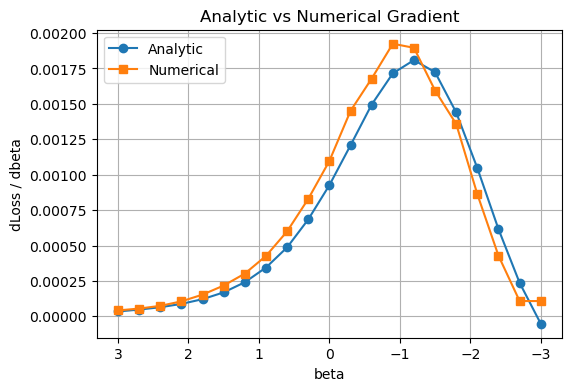

In [175]:
required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["beta"], df["analytic_grad"], marker="o", label="Analytic")
plt.plot(df["beta"], df[NUMERICAL_COLUMN], marker="s", label="Numerical")

plt.xlabel("beta")
plt.ylabel("dLoss / dbeta")
plt.title("Analytic vs Numerical Gradient")
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


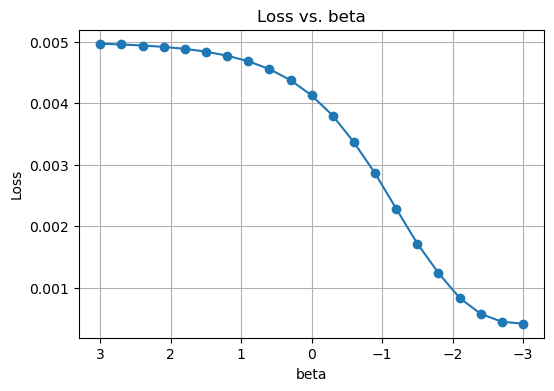

In [176]:
plt.figure(figsize=(6, 4))
plt.plot(df["beta"], df["loss"], marker="o")
plt.xlabel("beta")
plt.ylabel("Loss")
plt.title("Loss vs. beta")
plt.grid(True)
plt.gca().invert_xaxis()

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")
